# Проектная работа по модулю “Математика и статистика в Python”

<pre>
ФИО: Никифоров Владимир
</pre>

## Загрузить файл hr.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import scipy.stats as sts
import scipy.stats.mstats as mstats
from scipy.stats import pearsonr

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('../data/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Пояснения к колонкам

* satisfaction_level - уровень удовлетворенности работой
* last_evaluation - уровень последней оценки работы
* number_project -количество проектов
* average_montly_hours - среднее количество часов в месяц работы
* time_spend_company - шкала от 2 до 10, отражающее время работы в компании
* Work_accident - наличие инцидента на рабочем месте
* left - ушел ли работник или нет
* promotion_last_5years - факт повышения в течение 5 лет
* sales - департамент работника
* salary - уровень зарплаты

In [3]:
# рассмотрим данные: размер датасета
print(df.shape)
# информацию по датасету - типы и наличие NULL в столбцах
print(df.info())

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


Сразу видим, что пустых значений в столбцах нет - все стобцы заполнены 14999 непустыми значениями, что также можно проверить следующим образом:

In [4]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
# бОльшую часть статистик мы можем получить простейшей стандартной операцией описания датасета
# А именно: среднее (mean), медиану (50%), мин/макс, сред. отклонение (std)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Посчитаем моду
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# альтернативный вариант через mstats.mode подойдет для числовых переменных
df_mode = pd.DataFrame(data=list(df.describe().columns), columns=['column_name'])
df_mode['mode'] = list(mstats.mode(df[list(df.describe().columns)], axis=0).mode.data[0])
df_mode

,column_name,mode
0,satisfaction_level,0.10
1,last_evaluation,0.55
2,number_project,4.00
3,average_montly_hours,135.00
4,time_spend_company,3.00
5,Work_accident,0.00
6,left,0.00
7,promotion_last_5years,0.00


## Рассчитать и визуализировать корреляционную матрицу для переменных.

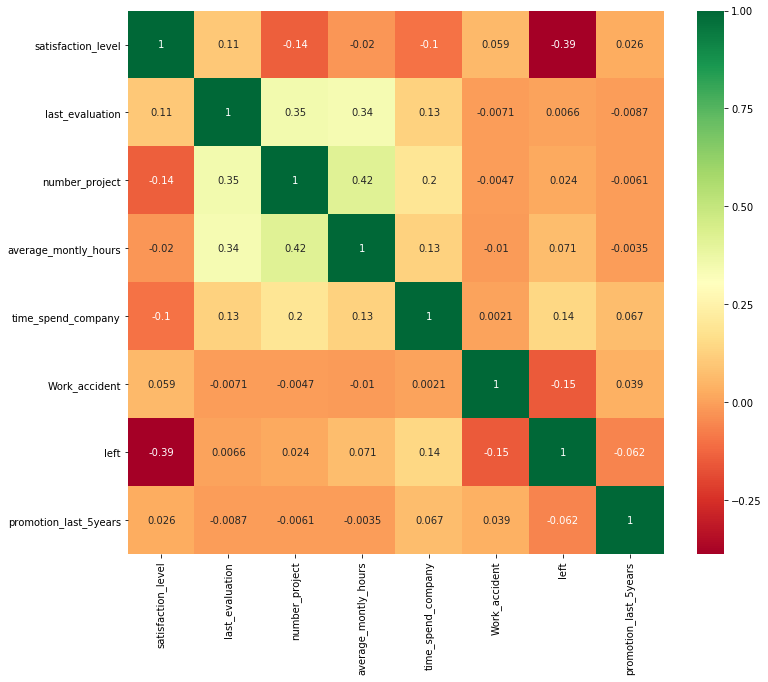

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

Из корреляционной матрицы можно сделать выводы о том, что признак - ушел/не_ушел обратно пропорционален уровню удовлетворенности сотрудника (-0.39) и корреляция "средней силы". Из других зависимостей можно увидеть корреляцию между количеством проектов и средним количеством рабочих часов в месяц (не удивительно конечно) (0.42), количеством проектов и результатами (возможно) прохождения последних тестов; и результатами прохождения последних тестов и средним количеством рабочих часов в месяц (то ли к тестам готовился, то ли взвалили сразу много проектов после прохождения тестов).

## Визуализировать несколько взаимосвязей между переменными

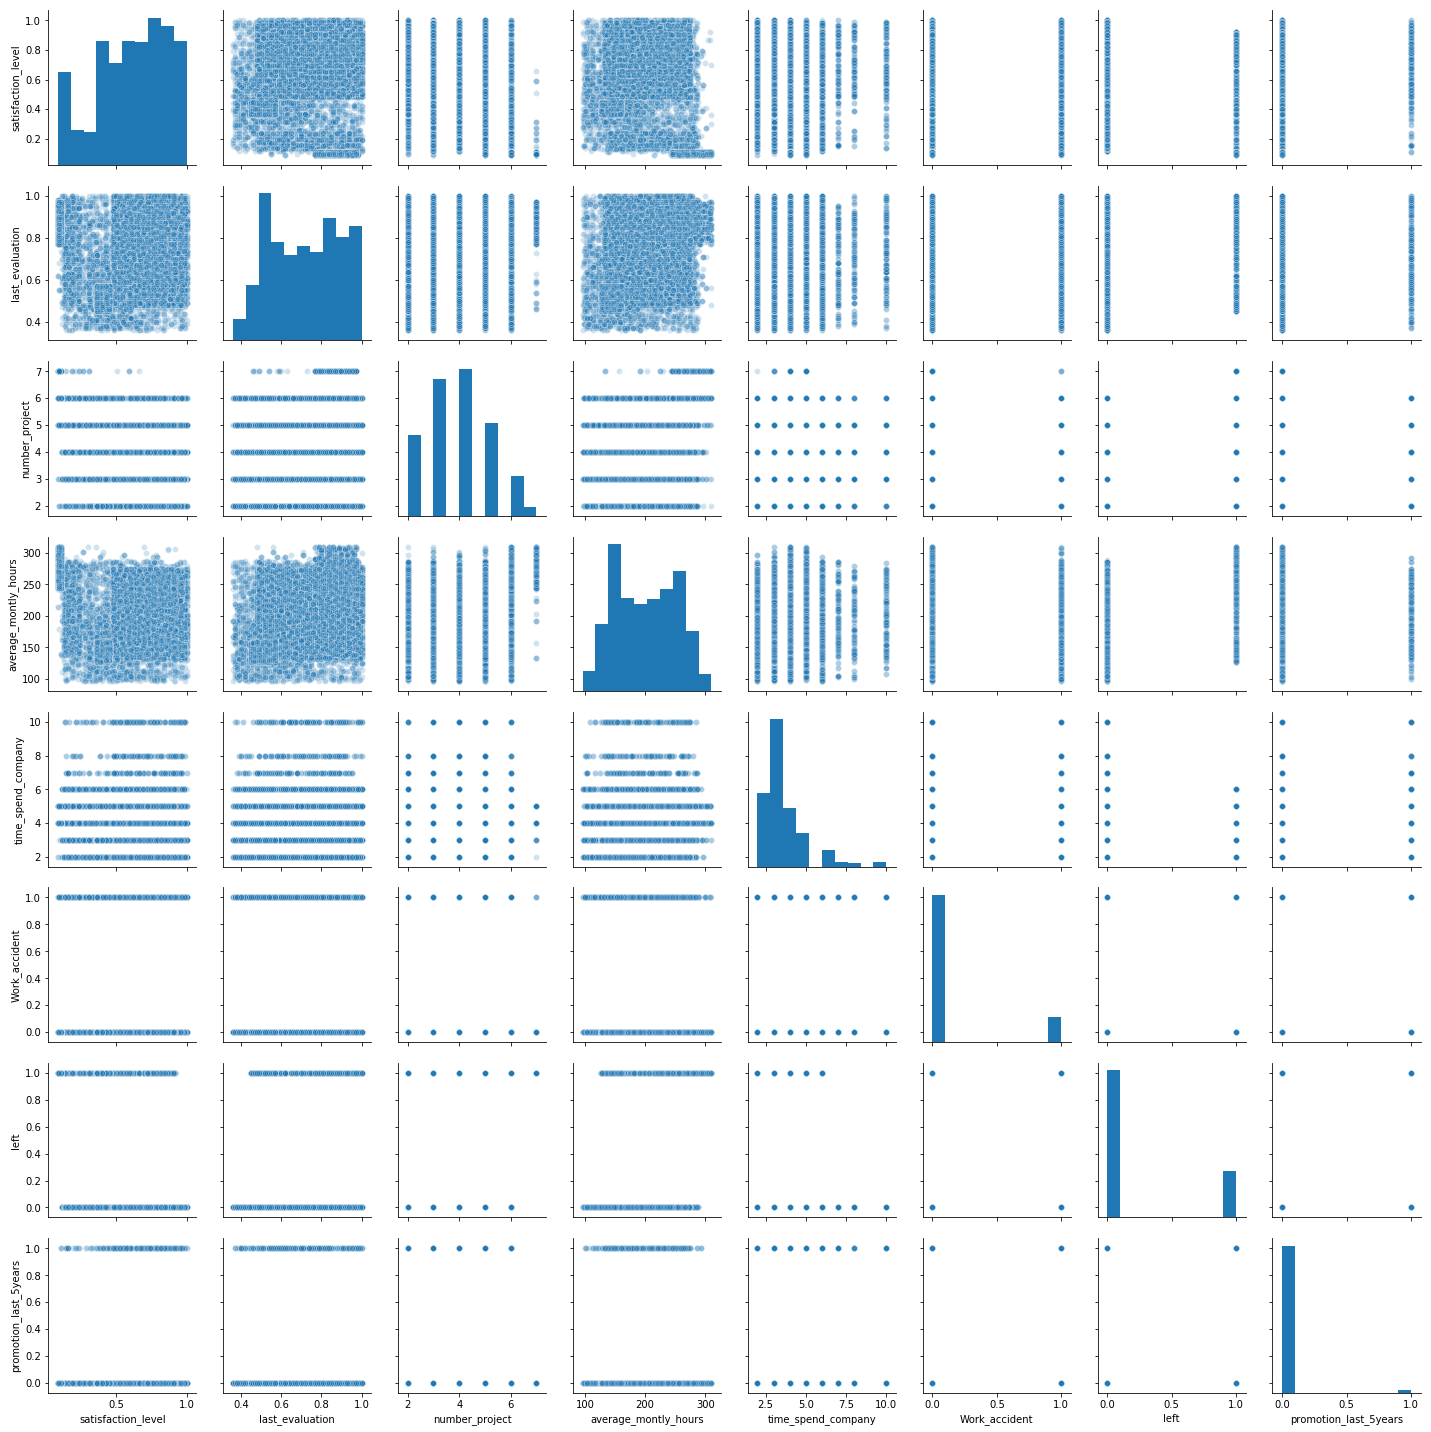

In [9]:
# Самый простой вариант визуализировать взаимосвязи - посмотреть pairplot:
sns.pairplot(data=df,plot_kws={'alpha':0.2});

Без разбиения по признаку Ушел/Не_Ушел особой картины не прослеживается.

Однако при разделении на классы видны некоторые кластера данных с явно выраженными ушедшими сотрудниками (жетлые скопления).

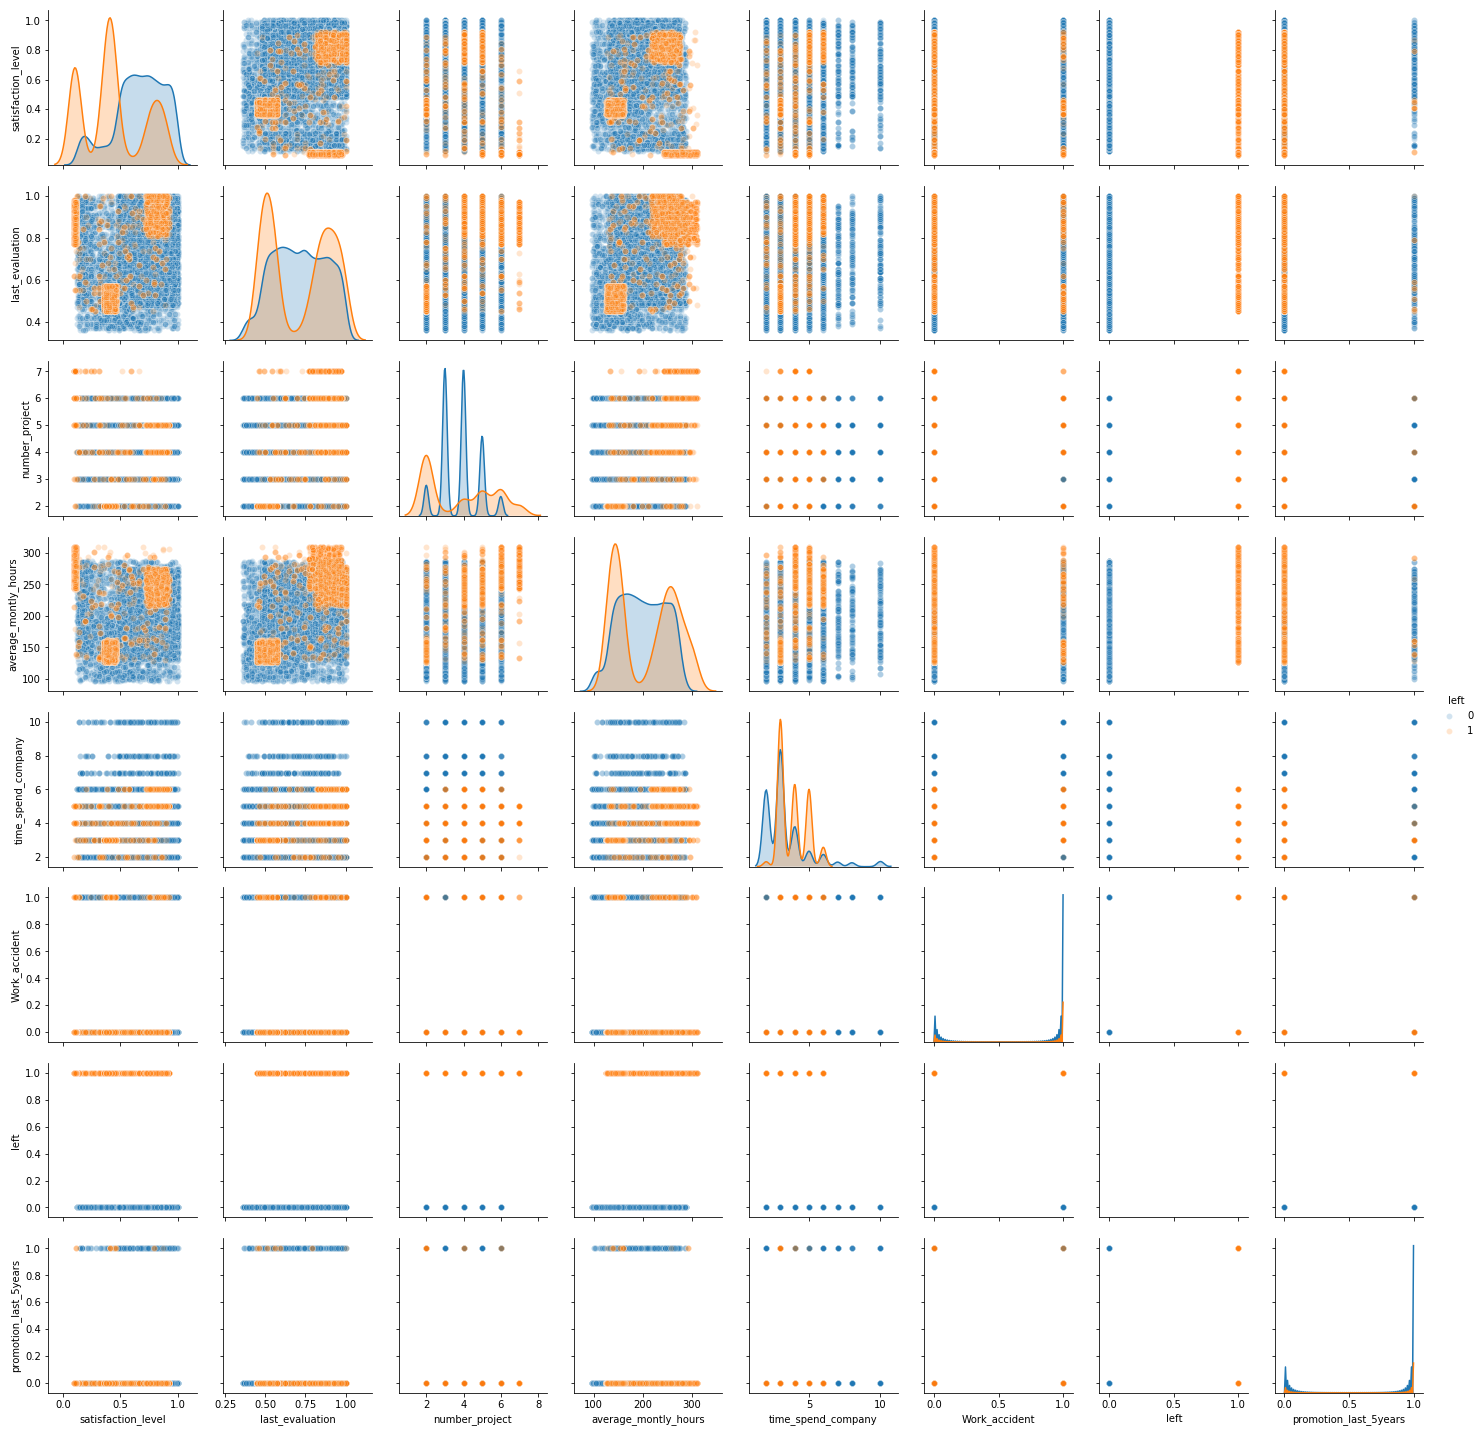

In [10]:
sns.pairplot(data=df,plot_kws={'alpha':0.2},hue='left');

Детальный анализ причин ниже в соответствующем пункте (сначала написал сюда, потом понял, что поспешил).

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [11]:
# Отнормируем числовые переменные датасета с сильной корреляцией
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(df[['satisfaction_level','average_montly_hours']])
df_norm = pd.concat([pd.DataFrame(np_scaled, columns=['satisfaction_level','average_montly_hours']),df[['left']]], axis = 1)
df_left = df_norm[df_norm['left']==1]
df_not_left = df_norm[df_norm['left']==0]

#### Проверим гипотезу о различии среднего уровня удовлетворенности между уволившимися и неуволившимися сотрудниками

In [12]:
sts.ttest_ind(df_left['satisfaction_level'], df_not_left['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

p-value меньше уровня значимости, а это означает, что мы можем отвергнуть нулевую гипотезу об одинаковых средних, а значит средний уровень удовлетворенности между уволившимися и неуволившимися сотрудниками отличается.

Проверим гипотезу о различии среднего значения средних количеств рабочих часов в месяц между уволившимися и неуволившимися сотрудниками:

In [13]:
sts.ttest_ind(df_left['average_montly_hours'], df_not_left['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850012, pvalue=2.3113035567539473e-18)

p-value меньше уровня значимости, а это означает, что мы можем отвергнуть нулевую гипотезу об одинаковых средних, а значит среднее значения средних количеств рабочих часов в месяц между уволившимися и неуволившимися сотрудниками отличается.

## Рассчитать сколько работников работает в каждом департаменте.

In [14]:
print('Количество сотрудников в каждом департаменте:')
df['sales'].value_counts()

Количество сотрудников в каждом департаменте:


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

## Показать распределение сотрудников по зарплатам.

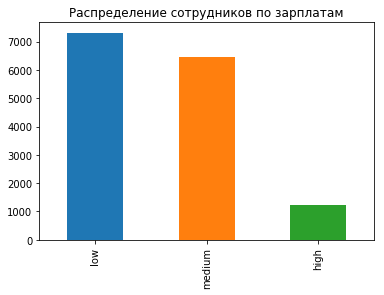

In [15]:
df['salary'].value_counts().plot.bar(title = 'Распределение сотрудников по зарплатам');

## Показать распределение сотрудников по зарплатам совместно с департаментами.

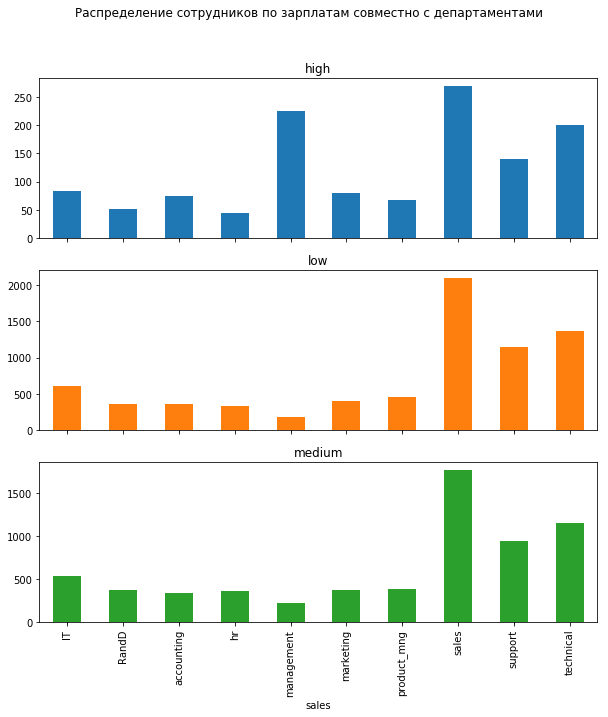

In [16]:
df.groupby('sales')['salary'].value_counts().unstack().plot.bar(title = 'Распределение сотрудников по зарплатам совместно с департаментами', subplots=True, layout=(3,1),legend=None, figsize=(10,10));

## Сколько сотрудников покинули компанию.

In [17]:
print(f"{df[df['left']==1]['left'].count()} сотрудников покинули компанию.")

3571 сотрудников покинули компанию.


## Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

Посмотрим на зависимость уровня удовлетворенности от количества отработанных часов в месяц:

In [18]:
df_left = df[df['left']==1]
df_not_left = df[df['left']==0]

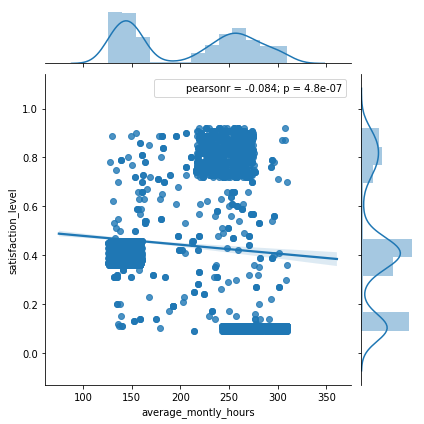

In [19]:
sns.jointplot(data=df_left,y='satisfaction_level',x='average_montly_hours',kind='reg',stat_func=pearsonr);

* Похоже, что есть какие-то группы сотрудников, у которых загрузка низкая и уровень удовлетворенности средний и они ушли.
* Но при этом есть группы сотрудников, у которых высокая загрузка, но степерь удовлетворенности самая низкая и может поэтому они ушли?
* Или ощутимо бОльшая группа сотрудников, у которых средне-высокая загрузка по часам, но и удовлетворенность у них максимальная - поэтому они ушли?

Кажется, это три абсолютно разные ситуации в жизни: 
* загрузки мало, удовлетверенность средняя - стало скучно - надо посмотреть на последние продвижения по службе, последние результаты тестов и количество проектов
* загрузки много, удовлетворенность на нуле - устал, все достало - надо посмотреть количество проектов без дОлжного продвижения по службе
* загрузка выше среднего, удовлетворенность на максимуме - достиг потолка в компании - переманили в другую компанию

### Отработаем первый сценарий: загрузки мало, удовлетверенность средняя - стало скучно - надо посмотреть на последние продвижения по службе, последние результаты тестов и количество проектов

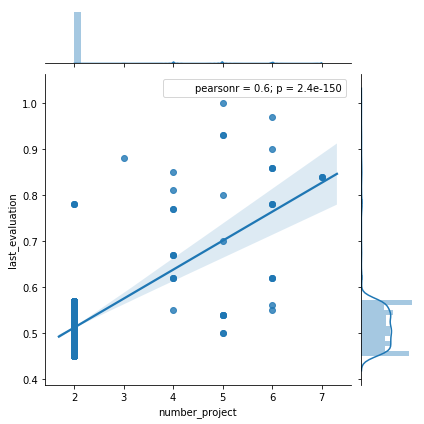

In [20]:
sns.jointplot(data=df_left[(df_left['average_montly_hours']<170) & (df_left['satisfaction_level']<=0.5)],y='last_evaluation',x='number_project',kind='reg',stat_func=pearsonr);

Судя по гистограмме количества проектов - давали почти всем 2 проекта в руки, а результаты на тестах - середнячки - в бой не рвались - им скучно, вот и ушли.

### Второй сценарий: загрузки много, удовлетворенность на нуле - устал, все достало - надо посмотреть количество проектов без дОлжного продвижения по службе

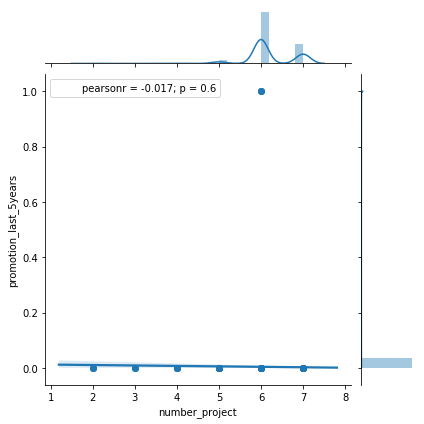

In [21]:
sns.jointplot(data=df_left[(df_left['average_montly_hours']>220) & (df_left['satisfaction_level']<=0.2)],y='promotion_last_5years',x='number_project',kind='reg',stat_func=pearsonr);

И действительно, продвинувшиеся попадают в разряд выбросов, судя по общему графику и вертикальной гистограмме продвижений.

### Третий явный вариант: загрузка выше среднего, удовлетворенность на максимуме - достиг потолка в компании - переманили в другую компанию

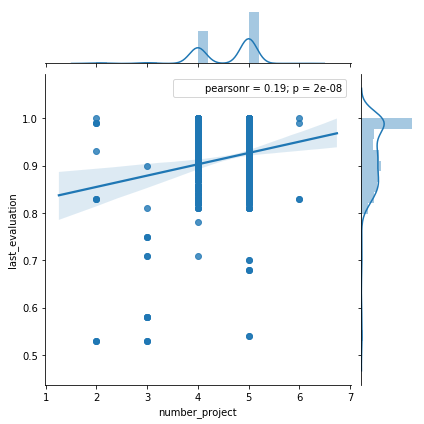

In [22]:
sns.jointplot(data=df_left[(df_left['average_montly_hours']>200) & (df_left['satisfaction_level']>=0.7)],y='last_evaluation',x='number_project',kind='reg',stat_func=pearsonr);

Судя по выше среднего результатам тестов и количеству проектов выше среднего - доверия к людям ввиду их компетенции было много, это профессионалы, которых захантили в другие компании, т.к. в этой не давали продвижения (promotion_last_5years).

А было ли продвижение у профессионалов, что ушли?


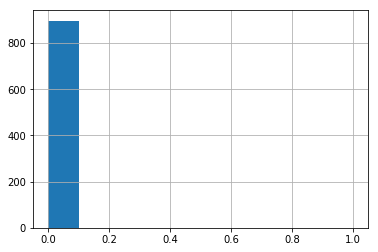

In [23]:
print('А было ли продвижение у профессионалов, что ушли?')
df_left[(df_left['average_montly_hours']>200) & (df_left['satisfaction_level']>=0.7)]['promotion_last_5years'].hist();

Ответ: НЕТ!

## Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте